Import needed libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

read the dataset:

In [2]:
data = pd.read_csv("student_scores.csv")

visualize the dataset using scatterplot:

Text(0, 0.5, 'Scores')

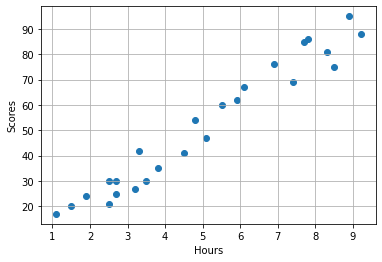

In [3]:
fig, ax = plt.subplots()
ax.grid()#сетка
ax.scatter(data['Hours'], data['Scores'])
ax.set_xlabel('Hours')#name column
ax.set_ylabel('Scores')#name row

write a hypothesis function:

In [4]:
x = data['Hours'].values
y = data['Scores'].values

slope, intersept = 0, 0
MSE = 0 #MSE = (y1 - (mx1+b))**2 + y2 - (mx2+b))**2 +...+ yn - (m * xn + b))**2) / n
for i in range(len(x)):
    MSE += (y[i] - (slope * x[i] + intersept))**2
print(MSE / float(len(x)))

3264.04


In [5]:
def hypothesis(theta1, theta0, hours):
    return(theta1 * hours + theta0)

write a gradient descent function:

In [6]:
alpha = 0.01
theta = [0, 0]
n = len(x)

def gradient(alpha, theta):
    b, m = theta[0], theta[1]
    for i in range(2000):
        mg, bg = 0, 0
        for i in range(n):
            xd = data['Hours'][i]
            yd = data['Scores'][i]
            bg += -(2/n) * (yd - hypothesis(m, b, xd))
            mg += -(2/n) * xd * (yd - hypothesis(m, b, xd))
        b -= alpha * bg
        m -= alpha * mg
    return [b, m]

theta = gradient(alpha, theta)
print("Theta1(slope) = {0}, theta0(intercept) = {1}".format(theta[1],theta[0]))

Theta1(slope) = 9.775870950745283, theta0(intercept) = 2.4832548596168906


visualize the dataset with a hypothesis line

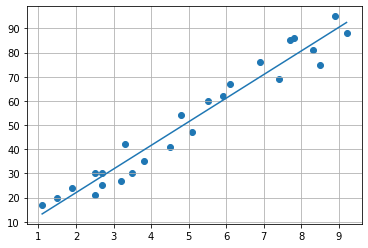

In [8]:
xmax = np.max(x)
xmin = np.min(x)

# Calculating line values x and y
xline = np.linspace(xmin, xmax)
yline = theta[0] + theta[1] * xline

plt.plot(xline, yline)
plt.scatter(x, y)

plt.grid()
plt.show()